# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data_path = "../data/txt/"

## Choisir une décennie

In [5]:
DECADE = '1840'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [6]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [7]:
# Exemple de fichiers
files[:5]

['Bxl_1847_Tome_I1_Part_2.txt',
 'Bxl_1847_Tome_I1_Part_3.txt',
 'Bxl_1847_Tome_I1_Part_4.txt',
 'Bxl_1847_Tome_I1_Part_5.txt',
 'Bxl_1848_Tome_I1_Part_1.txt']

In [8]:
texts = [open(data_path + f).read() for f in files]

In [9]:
# Exemple de textes
texts[0][:400]

"B Les bâtimens appartenant à l'Etat, qui sont employés pour des casernes\nou des écuries militaires, seront cédés à cet effet aux administrations locales,\nà charge de les entretenir cri bon étal et d e ne les employer à aucun autre\nusage que celui dont il vient d'être parlé. »\nSons disons que le législateur de 1814 n'a fait que suivre l'esprit du déeret de 1810. Que voulait ce décret? Que les ville"

## Vectoriser les documents à l'aide de TF-IDF

In [10]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [11]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [12]:
%time tfidf_vectors = vectorizer.fit_transform(texts)

CPU times: user 21.1 s, sys: 0 ns, total: 21.1 s
Wall time: 21.6 s


In [13]:
# Détail de la matrice
tfidf_vectors

<19x14118 sparse matrix of type '<class 'numpy.float64'>'
	with 49295 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [14]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

concessionnaires    0.376889
briques             0.235001
aveugles            0.177360
abonnés             0.167587
gendebien           0.150756
                      ...   
désirables          0.000000
désirant            0.000000
désirent            0.000000
désireront          0.000000
™+                  0.000000
Length: 14118, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [15]:
cosine([1, 2, 3], [1, 2, 3])

0

In [16]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [17]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [18]:
tfidf_array = tfidf_vectors.toarray()

In [19]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
# Vecteur du document 1
tfidf_array[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
cosine(tfidf_array[0], tfidf_array[1])

0.7477002450768226

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [27]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [28]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [29]:
clusters = km_model.fit_predict(tfidf_vectors)

In [30]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [32]:
pprint(dict(clustering))

{0: ['Bxl_1849_Tome_I1_Part_1.txt',
     'Bxl_1849_Tome_I1_Part_2.txt',
     'Bxl_1849_Tome_I1_Part_3.txt',
     'Bxl_1849_Tome_I1_Part_4.txt',
     'Bxl_1849_Tome_I1_Part_5.txt',
     'Bxl_1849_Tome_II1_Part_1.txt',
     'Bxl_1849_Tome_II1_Part_2.txt',
     'Bxl_1849_Tome_II1_Part_3.txt',
     'Bxl_1849_Tome_II1_Part_4.txt',
     'Bxl_1849_Tome_II1_Part_5.txt',
     'Bxl_1849_Tome_II1_Part_6.txt',
     'Bxl_1849_Tome_II1_Part_7.txt'],
 1: ['Bxl_1847_Tome_I1_Part_2.txt',
     'Bxl_1847_Tome_I1_Part_3.txt',
     'Bxl_1847_Tome_I1_Part_4.txt',
     'Bxl_1847_Tome_I1_Part_5.txt',
     'Bxl_1848_Tome_I1_Part_1.txt'],
 2: ['Bxl_1848_Tome_I1_Part_2.txt', 'Bxl_1848_Tome_I1_Part_3.txt']}


## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [33]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [34]:
reduced_vectors[:10]

array([[ 0.39929254, -0.25178904],
       [ 0.45838791, -0.09981747],
       [ 0.4318974 , -0.20431733],
       [ 0.33267948, -0.33289881],
       [ 0.1724229 , -0.21945769],
       [ 0.35012676,  0.51621764],
       [ 0.35865508,  0.54334128],
       [-0.16980043,  0.08552506],
       [-0.20597299, -0.12031989],
       [-0.14752635,  0.20689031]])

### Générer le plot

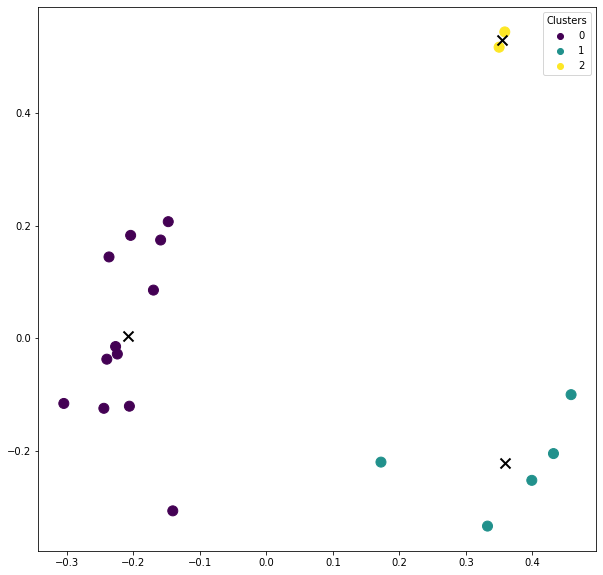

In [35]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")